In [16]:
import pandas as pd
%pip install requests
import requests
# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head(100)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-12T05:17:34.037Z,62.363300,-150.903700,21.60,1.10,ml,NaN,NaN,NaN,0.42,...,2025-11-12T05:19:40.556Z,"16 km SSW of Petersville, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2025-11-12T05:05:16.120Z,38.821835,-122.805168,2.37,0.52,md,6.0,95.0,0.01585,0.01,...,2025-11-12T05:22:19.369Z,"7 km NW of The Geysers, CA",earthquake,1.15,5.90,0.290,8.0,automatic,nc,nc
2,2025-11-12T05:01:50.980Z,33.458833,-116.440667,2.40,0.76,ml,47.0,74.0,0.13970,0.19,...,2025-11-12T05:05:17.178Z,"23 km NNW of Borrego Springs, CA",earthquake,0.17,0.66,0.131,25.0,automatic,ci,ci
3,2025-11-12T04:58:07.336Z,61.556300,-147.875700,20.60,1.80,ml,NaN,NaN,NaN,0.76,...,2025-11-12T05:10:11.125Z,"30 km SSW of Glacier View, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
4,2025-11-12T04:57:17.298Z,31.463000,-104.346000,0.00,1.50,ml,12.0,249.0,0.20000,0.90,...,2025-11-12T05:00:19.335Z,"55 km WNW of Toyah, Texas",earthquake,0.00,NaN,0.200,7.0,automatic,tx,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-11-11T18:00:10.360Z,38.821999,-122.805336,2.68,1.08,md,20.0,50.0,0.01605,0.02,...,2025-11-11T19:42:20.515Z,"7 km NW of The Geysers, CA",earthquake,0.25,0.47,0.060,21.0,automatic,nc,nc
96,2025-11-11T17:59:07.012Z,64.692100,-149.112900,13.70,1.20,ml,NaN,NaN,NaN,0.90,...,2025-11-11T18:02:10.231Z,"9 km N of Four Mile Road, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
97,2025-11-11T17:53:54.685Z,62.946000,-150.287400,11.90,1.60,ml,NaN,NaN,NaN,0.60,...,2025-11-11T17:56:03.543Z,"55 km NNE of Petersville, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
98,2025-11-11T17:53:12.000Z,38.785332,-122.772667,0.15,1.07,md,8.0,163.0,0.01556,0.08,...,2025-11-11T19:17:21.329Z,"2 km WNW of The Geysers, CA",earthquake,0.43,0.83,0.210,8.0,automatic,nc,nc


In [17]:
# 国ごとの地震発生頻度ランキングと最大マグニチュードランキングを作成し、合計ポイントで順位付け
# 地震データには国情報が直接含まれていないため、place列から国名を抽出
# マグニチュード4.0以上のデータに絞る
data = data.loc[data["mag"] >= 4.0].copy()
#str.split(",").str[-1]でカンマ区切りの最後の部分を国名として抽出
data["country"] = data["place"].str.split(",").str[-1]

# 国ごとの地震発生頻度ランキング作成
ranking = data["country"].value_counts().head(10)

# 頻度ランキングのデータフレーム化
ranking_df = ranking.reset_index()
ranking_df.columns = ["country", "count"]

# 各国の最大マグニチュードを追加
max_mag_per_country = data.groupby("country")["mag"].max()
ranking_df["max_mag"] = ranking_df["country"].map(max_mag_per_country)

# ランキングを1から始める
ranking_df.index += 1

print(ranking_df)

                      country  count  max_mag
1                      Russia    142      6.1
2                       Japan     81      6.8
3                 Philippines     79      6.0
4                   Indonesia     78      6.5
5                       Chile     38      5.6
6                 Afghanistan     22      6.3
7                      Turkey     22      6.0
8                      Alaska     22      5.4
9            Papua New Guinea     19      5.3
10  south of the Fiji Islands     19      5.4


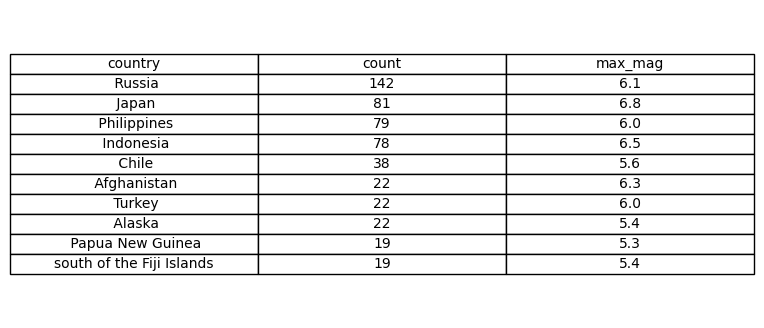

In [18]:
import matplotlib.pyplot as plt

# 表示したいデータ（上位10件だけ）
table_data = ranking_df[["country", "count", "max_mag"]].head(10)

# 図を作成
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# 表を作成
table = ax.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center')

# 表のスタイルを整える
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# 画像として保存
plt.savefig("ranking_table.png", bbox_inches='tight', dpi=300)
plt.show()